In [1]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.8 MB/s 


# AlexNet实现
## 参考：https://zh-v2.d2l.ai/chapter_convolutional-modern/alexnet.html#id18


In [8]:
!pwd

/content


In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [13]:
net = nn.Sequential(
    nn.Conv2d(1, 96, 11, stride=4),
    nn.MaxPool2d(3, stride=2),
    nn.Conv2d(96, 256, 5, padding=2),
    nn.MaxPool2d(3, stride=2),
    nn.Conv2d(256, 384, 3, padding=1),
    nn.Conv2d(384, 384, 3, padding=1),
    nn.Conv2d(384, 256, 3, padding=1),
    nn.MaxPool2d(3, stride=2),
#     展平成2D
    nn.Flatten(),
#     5 x 5 x 256
    nn.Linear(6400, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    # nn.Linear(4096, 4096),
    # nn.ReLU(),
    # nn.Dropout(0.5),
    nn.Linear(4096, 10)
)

In [4]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'Output Shape: ', X.shape)

Conv2d Output Shape:  torch.Size([1, 96, 54, 54])
MaxPool2d Output Shape:  torch.Size([1, 96, 26, 26])
Conv2d Output Shape:  torch.Size([1, 256, 26, 26])
MaxPool2d Output Shape:  torch.Size([1, 256, 12, 12])
Conv2d Output Shape:  torch.Size([1, 384, 12, 12])
Conv2d Output Shape:  torch.Size([1, 384, 12, 12])
Conv2d Output Shape:  torch.Size([1, 256, 12, 12])
MaxPool2d Output Shape:  torch.Size([1, 256, 5, 5])
Flatten Output Shape:  torch.Size([1, 6400])
Linear Output Shape:  torch.Size([1, 4096])
ReLU Output Shape:  torch.Size([1, 4096])
Dropout Output Shape:  torch.Size([1, 4096])
Linear Output Shape:  torch.Size([1, 4096])
ReLU Output Shape:  torch.Size([1, 4096])
Dropout Output Shape:  torch.Size([1, 4096])
Linear Output Shape:  torch.Size([1, 10])


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [5]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

loss 0.300, train acc 0.891, test acc 0.891
1453.2 examples/sec on cuda:0


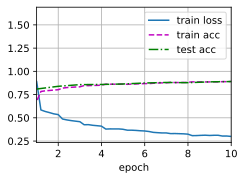

In [6]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.261, train acc 0.904, test acc 0.896
1533.5 examples/sec on cuda:0


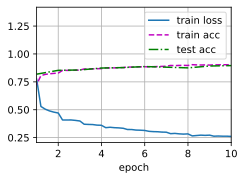

In [14]:
# 加入初始化
def weight_init(model):
  if isinstance(model,(nn.Linear, nn.Conv2d)):
    nn.init.xavier_uniform_(model.weight)
    # nn.init.constant_(model.bias, val=0)
lr, num_epochs = 0.1, 20
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())